# ARIMA: Autoregressive Integrated Moving Average

### Importing Relevant Packages

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook

from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = [10,7.5]

# J&J Quarterly EPS Revisited

### Import Dataset

In [7]:
data = pd.read_csv('data/jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


### Plotting the Data

It is clear that there is some seasonality and a positive trend.

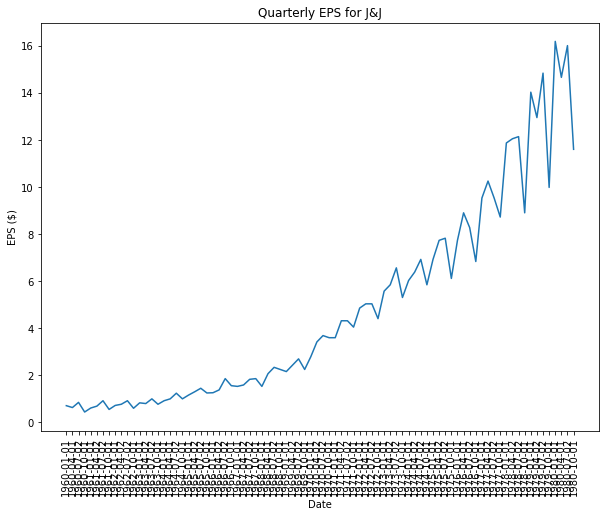

In [10]:
plt.plot(data['date'],data['data'])
plt.title('Quarterly EPS for J&J')
plt.ylabel('EPS ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show();

### Plot ACF & PACF

ACF is indicating that the timeseries has a trend and therefore, not stationary. The PACF is indicating is going into the blue zone after lag 2. The PACF is also showing a lack of stationarity with the sinusoidal pattern. 

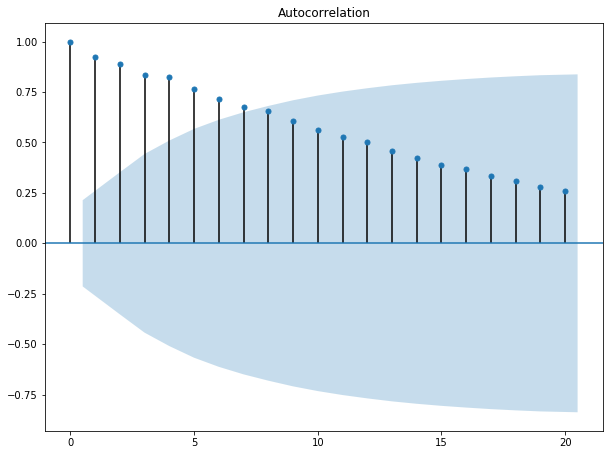

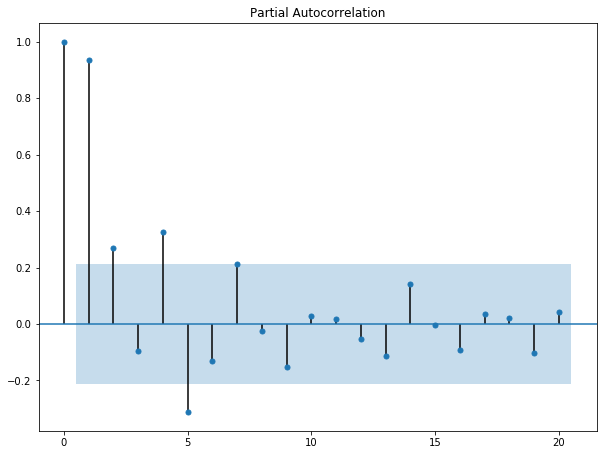

In [11]:
plot_acf(data['data']);
plot_pacf(data['data']);

### Make the Dataset Stationary

To achieve stationarity we are going to be using the log difference. Additionally, we will track the changes that we make to the dataset. 

In differencing, we lose the first element as a result of not being able to subtract the first data point from the one before it. 

In [12]:
data['data_tr_1'] = np.log(data['data'])
data['data_tr_1'] = data['data_tr_1'].diff()

data.head(10)

,date,data,data_tr_1
0,1960-01-01,0.71,NaN
1,1960-04-01,0.63,-0.119545
2,1960-07-02,0.85,0.299517
3,1960-10-01,0.44,-0.658462
4,1961-01-01,0.61,0.326684
5,1961-04-02,0.69,0.123233
6,1961-07-02,0.92,0.287682
7,1961-10-01,0.55,-0.514455
8,1962-01-01,0.72,0.269333
9,1962-04-02,0.77,0.067139


### Plotting the Differenced Dataset

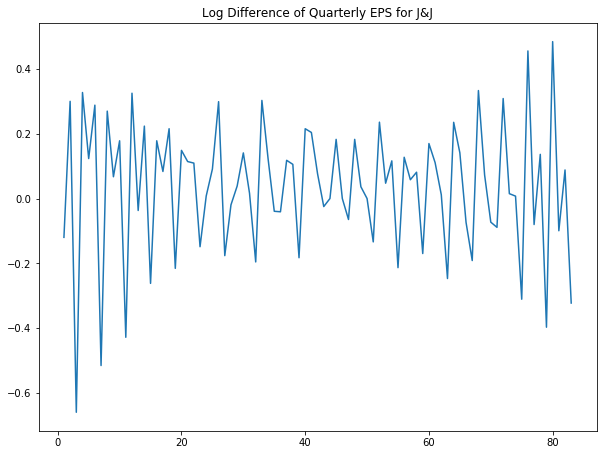

In [15]:
plt.plot(data['data_tr_1'])
plt.title('Log Difference of Quarterly EPS for J&J');

### Testing for Stationarity with AD Fuller

Yes, we can reject the null hypothesis that it is not stationary.

In [16]:
ad_fuller_result = adfuller(data['data_tr_1'][1:])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811839
p-value: 0.000414973140444062


### ACF AND PACF

We add the snippet of indexing from one and onwards because the first value is NaN. One way to not have to do this would be to just drop the first value like we did in other notebooks. 

ACF is sinusoidal and decreasing. For the PACF, we can also see wavy behavior. The order cannot be concluded so we are going to write a function to test a variety of parameters. 

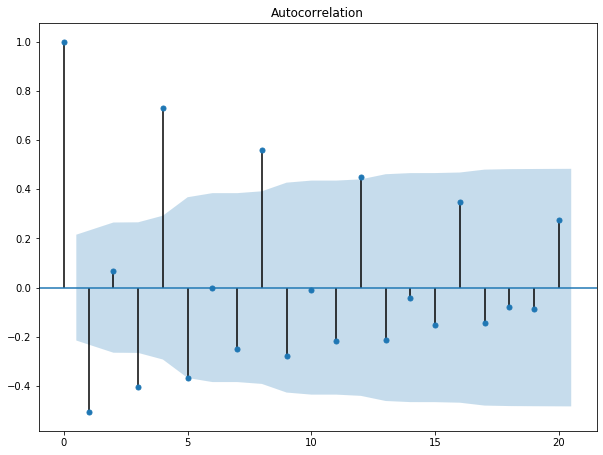

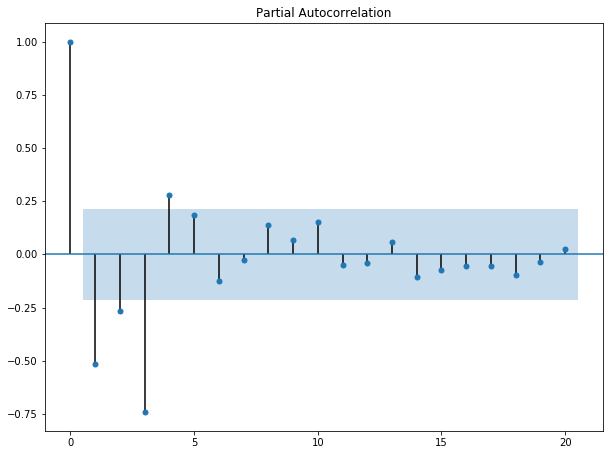

In [18]:
plot_acf(data['data_tr_1'][1:]);
plot_pacf(data['data_tr_1'][1:]);

### Writing a Function to Determine Order

In [ ]:
Since the 